In [ ]:
import autograd.numpy as np
from autograd import grad 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train

# Binary classification

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

x_1 = train.loc[:,'overall']
x_1 = x_1.to_numpy()


train_arr = train.to_numpy()
test_arr = test.to_numpy()

train_reviewText = train_arr[:,6]
train_summary = train_arr[:,7]
# Source: https://www.geeksforgeeks.org/python-concatenate-two-lists-element-wise/
train_review = [str(i) + " " + str(j) for i,j in zip(train_reviewText, train_summary)]

test_reviewText = test_arr[:,5]
test_summary = test_arr[:,6]
test_review = [str(i) + " " + str(j) for i,j in zip(test_reviewText, test_summary)]

In [88]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_df = 0.5, max_features = 3000)
X = vectorizer.fit_transform(train_review)
X_test = vectorizer.transform(test_review)

In [89]:
y_train_1 = np.where(x_1 > 1, 1, 0)
y_train_2 = np.where(x_1 > 2, 1, 0)
y_train_3 = np.where(x_1 > 3, 1, 0)
y_train_4 = np.where(x_1 > 4, 1, 0)

# Binary classification LogisticRegression cutoff 1

In [90]:
#logistic model
logr = LogisticRegression()

param_grid = {
    'C':[0.1,1,10,100,1000],
}

grid_search = GridSearchCV(logr, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_1)

best_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams)
print(best_score)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'C': 10}
0.7593745713266035


/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Why I picked my hyperparam1
### The reason why C affects logistics model is because it has to determine between fitting the training data well and keeping the model parameters small. So having a smaller C is less likely to over fit whille a larger C can make a more complex model that probably fits the data better but more likely to over fit.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_1, test_size=0.2)

In [76]:
logistic_model = LogisticRegression(**best_hyperparams)
logistic_model.fit(x_train, y_train)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [77]:
y_pred = logistic_model.predict(x_test)

In [78]:
print(y_pred)
# y_pred = y_pred[:,1]
# y_pred

[1 1 1 ... 1 0 1]


[2 1 0]


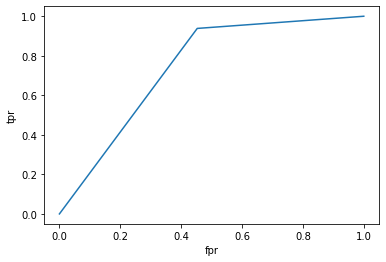

In [79]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7427861820567168

In [81]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  4295
False Positive(FP) =  571
True Negative(TN)  =  690
False Negative(FN) =  282


In [82]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the logistic classifier = {:0.3f}'.format(accuracy))

Accuracy of the logistic classifier = 0.854


In [83]:
f1_score(y_test, y_pred, average='macro')

0.7638356122546199

In [84]:
kaggle = LogisticRegression(C=1,penalty='l2',solver='newton-cg')
print(np.shape(X))
print(np.shape(y_train_3))
kaggle.fit(X, y_train_3)

prediction = kaggle.predict(X_test)

test_ids = test.index
test_submission = pd.DataFrame({'id':test_ids, 'predicted':prediction})
test_submission.head()

# put in CSV file
test_submission.to_csv('test_submission_part_1.csv', index=False)


(29189, 3000)
(29189,)


# Report 1
## The highest I got on Kaggle test was a .76153

# Binary classification LogisticRegression cutoff 2

In [17]:
logr = LogisticRegression()

param_grid = {
    'C':[0.1,1,10,100,1000],
}

grid_search = GridSearchCV(logr, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_2)

best_hyperparams_2 = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams_2)
print(best_score)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'C': 1}
0.7673947899116882


/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_2, test_size=0.2)

In [19]:
logistic_model = LogisticRegression(**best_hyperparams_2)
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1)

In [20]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


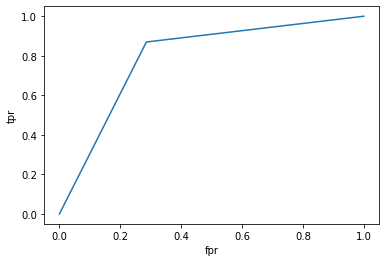

In [21]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7919825072886297

In [23]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  2983
False Positive(FP) =  688
True Negative(TN)  =  1720
False Negative(FN) =  447


In [24]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the logistic classifier = {:0.3f}'.format(accuracy))

Accuracy of the logistic classifier = 0.806


# Report 2
## The highest score I got on Kaggle was .7974

# Binary classification LogisticRegression cutoff 3

In [25]:
logr = LogisticRegression()

param_grid = {
    'C':[0.1,1,10,100,1000],
}

grid_search = GridSearchCV(logr, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_3)

best_hyperparams_3 = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams_3)
print(best_score)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'C': 1}
0.7785096782740479


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_3, test_size=0.2)

In [27]:
logistic_model = LogisticRegression(**best_hyperparams_3)
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1)

In [28]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


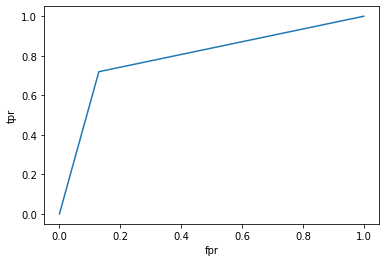

In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.794914064808431

In [31]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1646
False Positive(FP) =  460
True Negative(TN)  =  3090
False Negative(FN) =  642


In [32]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the logistic classifier = {:0.3f}'.format(accuracy))

Accuracy of the logistic classifier = 0.811


# Report number 3
## The highest score i got on kaggle was a .80173

# Binary classification cutoff LogisticRegression 4

In [81]:
logr = LogisticRegression()

param_grid = {
    'C':[0.1,1,10,100,1000],
}

grid_search = GridSearchCV(logr, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_4)

best_hyperparams_4 = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams_4)
print(best_score)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'C': 10}
0.7096351223181887


/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_4, test_size=0.2)

In [83]:
logistic_model = LogisticRegression(**best_hyperparams_4)
logistic_model.fit(x_train, y_train)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [84]:
y_pred = logistic_model.predict(x_test)

[0 0 1 ... 0 1 0]


[2 1 0]


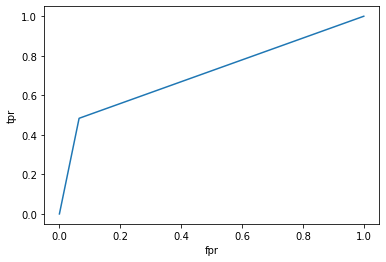

In [85]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [86]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7095310097946936

In [87]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  550
False Positive(FP) =  304
True Negative(TN)  =  4397
False Negative(FN) =  587


In [88]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the logistic classifier = {:0.3f}'.format(accuracy))

Accuracy of the logistic classifier = 0.847


# Report number 4
## The highest score I got on kaggle was a .7063

# Binary classification cutoff Decision Tree 1


In [151]:
#Decision tree model
decision_model = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_leaf': [1, 2, 3, 4, 5]
             }
grid_search = GridSearchCV(decision_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_1)

best_decision_hyperparams = grid_search.best_params_
best_decision_score = grid_search.best_score_

print(best_decision_hyperparams)
print(best_decision_score)


{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}
0.6638961960866843


# Why I picked my hyperparam 2
### Max depth affects the decision tree model by controling the depth of the tree. So a higher max depth can lead to more complex relationships but at the cost of overfitting. While a lower depth has simpler trees but can better generalize the data
### min_sample_split affects the decision tree by controling the number of min number of samples required to split a node. What this means is that a larger min_sample_split can lead to fewer splits, which is less likely to overfit the data.
### min_sample_leaf is similar to min_sample_split where a larger value is less likely to overfit but too high of a value can lead to a low complexity tree which ends up underfitting the data

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_1, test_size=0.2)

In [153]:
decision_model = DecisionTreeClassifier(**best_decision_hyperparams)
decision_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4)

In [154]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


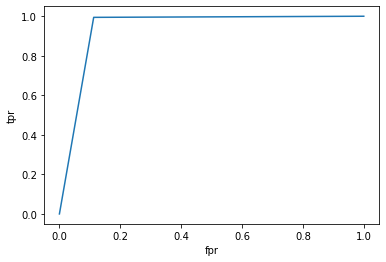

In [155]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [156]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9409005770983091

In [157]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  4622
False Positive(FP) =  134
True Negative(TN)  =  1056
False Negative(FN) =  26


In [158]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy for the decision forest classifier = {:0.3f}'.format(accuracy))

Accuracy for the decision forest classifier = 0.973


# Binary classification cutoff Decision Tree 2


In [159]:
#Decision tree model
decision_model = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_leaf': [1, 2, 3, 4, 5]
             }
grid_search = GridSearchCV(decision_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_2)

best_decision_hyperparams_2 = grid_search.best_params_
best_decision_score = grid_search.best_score_

print(best_decision_hyperparams_2)
print(best_decision_score)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.6345964485979059


In [189]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_2, test_size=0.2)

In [190]:
decision_model = DecisionTreeClassifier(**best_decision_hyperparams_2)
decision_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6)

In [191]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


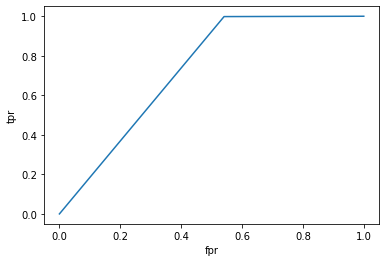

In [192]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [193]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7286576050370805

In [194]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  3451
False Positive(FP) =  1288
True Negative(TN)  =  1093
False Negative(FN) =  6


In [195]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy for the decision forest classifier = {:0.3f}'.format(accuracy))

Accuracy for the decision forest classifier = 0.778


# Binary classification cutoff Decision Tree 3


In [175]:
#Decision tree model
decision_model = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_leaf': [1, 2, 3, 4, 5]
             }
grid_search = GridSearchCV(decision_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_3)

best_decision_hyperparams_3 = grid_search.best_params_
best_decision_score = grid_search.best_score_

print(best_decision_hyperparams_3)
print(best_decision_score)

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 7}
0.6479761325560215


In [196]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_3, test_size=0.2)

In [197]:
decision_model = DecisionTreeClassifier(**best_decision_hyperparams_3)
decision_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=7)

In [198]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


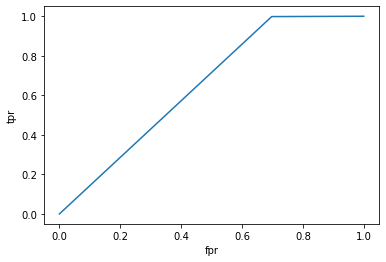

In [199]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [200]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6503674005706148

In [201]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  2326
False Positive(FP) =  2447
True Negative(TN)  =  1061
False Negative(FN) =  4


In [202]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy for the decision forest classifier = {:0.3f}'.format(accuracy))

Accuracy for the decision forest classifier = 0.580


# Binary classification cutoff Decision Tree 4


In [203]:
#Decision tree model
decision_model = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_leaf': [1, 2, 3, 4, 5]
             }
grid_search = GridSearchCV(decision_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_4)

best_decision_hyperparams_4 = grid_search.best_params_
best_decision_score = grid_search.best_score_

print(best_decision_hyperparams_4)
print(best_decision_score)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.6163951458751085


In [204]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_4, test_size=0.2)

In [206]:
decision_model = DecisionTreeClassifier(**best_decision_hyperparams_4)
decision_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=3)

In [207]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


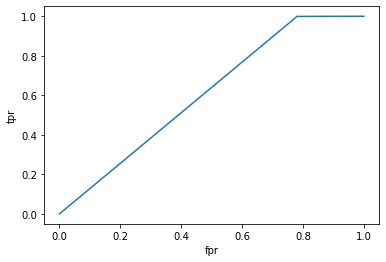

In [208]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [209]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6091588052003667

In [210]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1138
False Positive(FP) =  3669
True Negative(TN)  =  1030
False Negative(FN) =  1


In [211]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy for the decision forest classifier = {:0.3f}'.format(accuracy))

Accuracy for the decision forest classifier = 0.371


# Binary classification cutoff Randomforest 1

In [139]:
# Random forest model
random_fr_model = RandomForestClassifier()

param_grid = {
    'max_depth': [2, 5, 10, None],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(random_fr_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_1)

best_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 1}
0.7315426463311876


# Why I picked my hyperparam 3
### max_depth: this is similar to the decision tree where a higher value leads to a more complex tree, but you also run the risk of overfitting.
### min_samples_leaf: is similar to the decision tree where it controls the min number of samples on a leaf node. A low value can make it underfit the data while too high of a value can lead it to overfit the data

In [140]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_1, test_size=0.2)

In [142]:
logistic_model = RandomForestClassifier(**best_hyperparams)
logistic_model.fit(x_train, y_train)

RandomForestClassifier()

In [144]:
y_pred = logistic_model.predict(x_test)

[2 1 0]


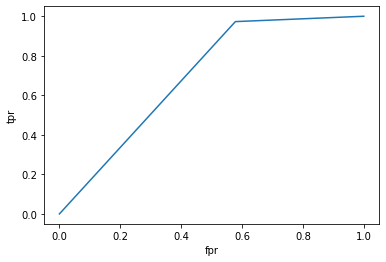

In [145]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6973693661000163

In [147]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  4515
False Positive(FP) =  692
True Negative(TN)  =  505
False Negative(FN) =  126


In [149]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the random forest classifier = {:0.3f}'.format(accuracy))

Accuracy of the random forest classifier = 0.860


# Binary classification cutoff Randomforest 2


In [212]:
# Random forest model
random_fr_model = RandomForestClassifier()

param_grid = {
#     'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(random_fr_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_2)

best_hyperparams_rf_2 = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams_rf_2)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 2}
0.7624884012102783


In [213]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_2, test_size=0.2)

In [215]:
random_model = RandomForestClassifier(**best_hyperparams_rf_2)
random_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2)

In [217]:
y_pred = random_model.predict(x_test)

[2 1 0]


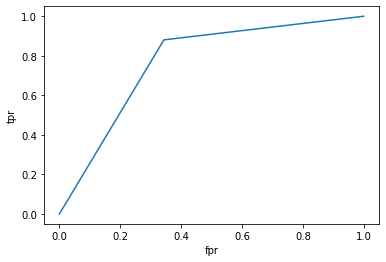

In [218]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [219]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7686140949573207

In [222]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  3081
False Positive(FP) =  803
True Negative(TN)  =  1536
False Negative(FN) =  418


In [223]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the random forest classifier = {:0.3f}'.format(accuracy))

Accuracy of the random forest classifier = 0.791


# Binary classification cutoff Randomforest 3


In [224]:
# Random forest model
random_fr_model = RandomForestClassifier()

param_grid = {
#     'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(random_fr_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_3)

best_hyperparams_rf_3 = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams_rf_3)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 2}
0.7596742812622583


In [225]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_3, test_size=0.2)

In [226]:
random_model = RandomForestClassifier(**best_hyperparams_rf_3)
random_model.fit(x_train, y_train)

RandomForestClassifier()

In [227]:
y_pred = random_model.predict(x_test)

[2 1 0]


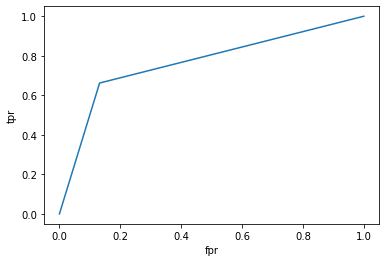

In [228]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [229]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7650749415975457

In [230]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1484
False Positive(FP) =  475
True Negative(TN)  =  3122
False Negative(FN) =  757


In [231]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the random forest classifier = {:0.3f}'.format(accuracy))

Accuracy of the random forest classifier = 0.789


# Binary classification cutoff Randomforest 4

In [232]:
# Random forest model
random_fr_model = RandomForestClassifier()

param_grid = {
#     'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(random_fr_model, param_grid, cv=5, scoring="f1_macro")

grid_search = grid_search.fit(X,y_train_4)

best_hyperparams_rf_4 = grid_search.best_params_
best_score = grid_search.best_score_

print(best_hyperparams_rf_4)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.6700649026987333


In [233]:
x_train, x_test, y_train, y_test = train_test_split(X, y_train_4, test_size=0.2)

In [235]:
random_model = RandomForestClassifier(**best_hyperparams_rf_4)
random_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [236]:
y_pred = random_model.predict(x_test)

[2 1 0]


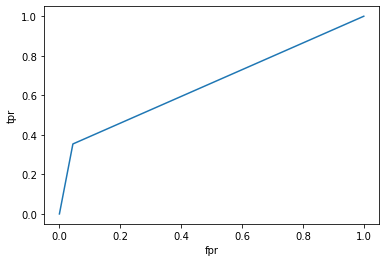

In [237]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
print(thresholds)

In [238]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6547991775873814

In [239]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  396
False Positive(FP) =  209
True Negative(TN)  =  4510
False Negative(FN) =  723


In [240]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the random forest classifier = {:0.3f}'.format(accuracy))

Accuracy of the random forest classifier = 0.840


# Multiclass classification

# Multinomial Navie Bayes classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB
y_multi_train = train_overall.astype(int)

In [66]:
multi = MultinomialNB()
param_grid = {'fit_prior':[True,False],
             'alpha': [.01,.1,1,10]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring="f1_macro")
grid_search = grid_search.fit(X,y_multi_train)

best_multi_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

print(best_multi_hyperparams)
print(best_score)

{'alpha': 10, 'fit_prior': True}
0.4804179113923997


# Why I chose my hyperparams 4
### alpha: this controls the amount of smoothing applied to the feature probabilites. 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y_multi_train, test_size=0.2)

In [9]:
multi = MultinomialNB(**best_multi_hyperparams)
multi.fit(x_train, y_train)

MultinomialNB(alpha=10)

In [10]:
y_pred = multi.predict(x_test)
y_pred

array([5, 1, 3, ..., 1, 2, 3])

In [222]:
clf = MultinomialNB(**best_multi_hyperparams)
print(np.shape(X))
print(np.shape(y_multi_train))
clf.fit(X,y_multi_train)
kaggle_prediction_multi = clf.predict(X_test)

# Submission df
test_ids = test.index
test_submission = pd.DataFrame({'id':test_ids, 'predicted':kaggle_prediction_multi})

# put in CSV file
test_submission.to_csv('test_submission_part_multi.csv', index=False)

(29189, 3000)
(29189,)


/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


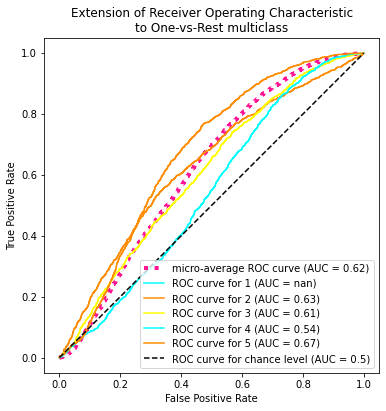

In [14]:
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_prob = multi.predict_proba(x_test)
y_true = label_binarize(y_test, classes=np.arange(5))
n_classes = len(np.unique(y_multi_train))


fpr, tpr, roc_auc = dict(), dict(), dict()
fpr['micro'], tpr['micro'], threshold = roc_curve(y_true.ravel(), y_pred_prob.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

fig, ax = plt.subplots(figsize=(6,8))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

target_names = ['1', '2', '3', '4', '5']
colors = cycle(['aqua', 'darkorange', 'yellow'])
for classid, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_true[:, classid],
        y_pred_prob[:, classid],
        name=f"ROC curve for {target_names[classid]}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [110]:
confusion = confusion_matrix(y_test, y_pred)
print('The confusion matrix is: ' '\n'+ str(confusion))

The confusion matrix is: 
[[837 247  93  35  31]
 [275 447 290 112  72]
 [ 96 303 427 224 100]
 [ 60 105 240 461 289]
 [ 44  61  81 205 703]]


In [111]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is: " + str(accuracy))

The accuracy score is: 0.49246317231928743


In [16]:
f1_score = f1_score(y_test, y_pred, average='macro')
print("the f1 macro score is: " + str(f1_score))

the f1 macro score is: 0.4874035225350192


# Report number 5
## the highest score i got on kaggle was a .49431

# K nearest neighbors

In [18]:
y_knear_train = train_overall.astype(int)

In [19]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 
              'weights': ['uniform', 'distance'], 
              'p': [1, 2]}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="f1_macro")
grid_search = grid_search.fit(X,y_knear_train)

best_knn_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

print(best_knn_hyperparams)
print(best_score)

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.22820926254727256


# Why i chose my hyperparam 5
### n_neighbors this affects the num of nearest neighbors to consider. So this can affect how well the data fits since a lower value can lead to overfitting whille vice versa is true
### weights: This affects the weight function used when predicting. So uniform leads to neighbors having the samee value while distance will make neighbors that are closer influence the prediction.
### p this represents the power parameter so a 1 would be manhattan distance while a 2 would be euclidean

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y_knear_train, test_size=0.2)

In [21]:
knn = KNeighborsClassifier(**best_knn_hyperparams)
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [22]:
y_pred = knn.predict(x_test)
y_pred

array([3, 5, 3, ..., 3, 3, 3])

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


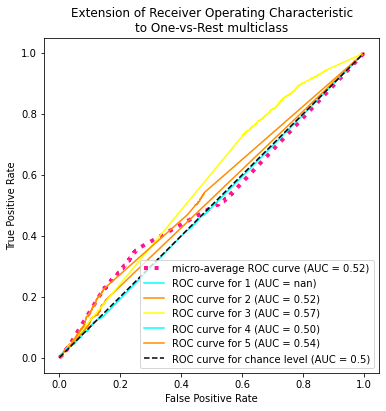

In [23]:
y_pred_prob = knn.predict_proba(x_test)
y_true = label_binarize(y_test, classes=np.arange(5))
n_classes = len(np.unique(y_multi_train))


fpr, tpr, roc_auc = dict(), dict(), dict()
fpr['micro'], tpr['micro'], threshold = roc_curve(y_true.ravel(), y_pred_prob.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

fig, ax = plt.subplots(figsize=(6,8))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

target_names = ['1', '2', '3', '4', '5']
colors = cycle(['aqua', 'darkorange', 'yellow'])
for classid, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_true[:, classid],
        y_pred_prob[:, classid],
        name=f"ROC curve for {target_names[classid]}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [24]:
confusion = confusion_matrix(y_test, y_pred)
print('The confusion matrix is: ' '\n'+ str(confusion))

The confusion matrix is: 
[[ 190   45  894   21   17]
 [  41   66 1040   31   29]
 [  22   66  984   66   61]
 [  18   34  853  102  119]
 [  13   31  737  101  257]]


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is: " + str(accuracy))

The accuracy score is: 0.2738951695786228


In [82]:
f1_score = f1_score(y_test, y_pred, average='macro')
print("the f1 macro score is: " + str(f1_score))

the f1 macro score is: 0.2600967560838396


# Random forest multi version

In [51]:
random_forest_train = train_overall.astype(int)

In [52]:
rf_model = RandomForestClassifier()
param_grid = {'max_depth': [2, 5, 10, None],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="f1_macro")
grid_search = grid_search.fit(X,random_forest_train)

best_rf_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

print(best_rf_hyperparams)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 4}
0.4538760817365124


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, random_forest_train, test_size=0.2)

In [59]:
rf_model = RandomForestClassifier(**best_rf_hyperparams)
rf_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4)

In [60]:
y_pred = rf_model.predict(x_test)
y_pred

array([4, 3, 3, ..., 1, 1, 5])

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


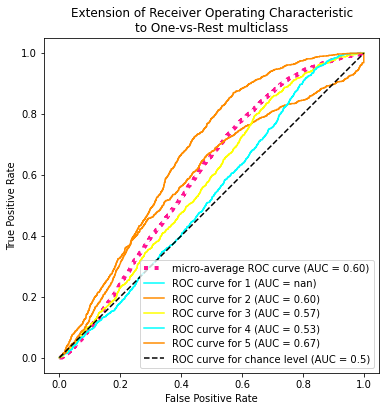

In [62]:
y_pred_prob = rf_model.predict_proba(x_test)
y_true = label_binarize(y_test, classes=np.arange(5))
n_classes = len(np.unique(y_multi_train))


fpr, tpr, roc_auc = dict(), dict(), dict()
fpr['micro'], tpr['micro'], threshold = roc_curve(y_true.ravel(), y_pred_prob.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

fig, ax = plt.subplots(figsize=(6,8))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

target_names = ['1', '2', '3', '4', '5']
colors = cycle(['aqua', 'darkorange', 'yellow'])
for classid, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_true[:, classid],
        y_pred_prob[:, classid],
        name=f"ROC curve for {target_names[classid]}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

In [63]:
confusion = confusion_matrix(y_test, y_pred)
print('The confusion matrix is: ' '\n'+ str(confusion))

The confusion matrix is: 
[[819 202  62  56  46]
 [335 405 189 127  99]
 [144 266 349 276 150]
 [ 77  94 177 499 349]
 [ 61  56  63 259 678]]


In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is: " + str(accuracy))

The accuracy score is: 0.4710517300445358


In [68]:
f1_score = f1_score(y_test, y_pred, average='macro')
print("the f1 macro score is: " + str(f1_score))

the f1 macro score is: 0.47188283588618674


# Clustering

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score

In [40]:
x_data =test.loc[:,'reviewText']
true_labels = test.loc[:,'category']
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_df = 0.5, max_features = 5)
kmeans = KMeans(n_clusters=6)
X = vectorizer.fit_transform(x_data)
y_pred = kmeans.fit_predict(X)

score = silhouette_score(X, y_pred)
print('Silhouetter Score: %.3f' % score)

rand = rand_score(true_labels, y_pred)
print('Rand ind score: %.3f' % rand)

/Users/robertlopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score: 0.795
Rand ind score: 0.658
